In [1]:
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_excel('/home/alyabdillah/Documents/Prog/Data Science/TP1/autos_acp.xls',header=0,
index_col=0)
data.head()

,CYL,PUISS,LONG,LARG,POIDS,V-MAX,FINITION,PRIX,R-POID.PUIS
Modele,,,,,,,,,
Alfasud TI,1350,79,393,161,870,165,B,30570,11.012658
Audi 100,1588,85,468,177,1110,160,TB,39990,13.058824
Simca 1300,1294,68,424,168,1050,152,M,29600,15.441176
Citroen GS Club,1222,59,412,161,930,151,M,28250,15.762712
Fiat 132,1585,98,439,164,1105,165,B,34900,11.275510


In [2]:
print(data.shape)
n=data.shape[0]
print("nombre d'observation: ",n)
p=data.shape[1]
print("nombre de variable: ",p)


(18, 9)
nombre d'observation:  18
nombre de variable:  9


FileNotFoundError: [Errno 2] No such file or directory: '/home/alyabdillah/Documents/Prog/Data Science/dsProject/DataVisualisation.png'

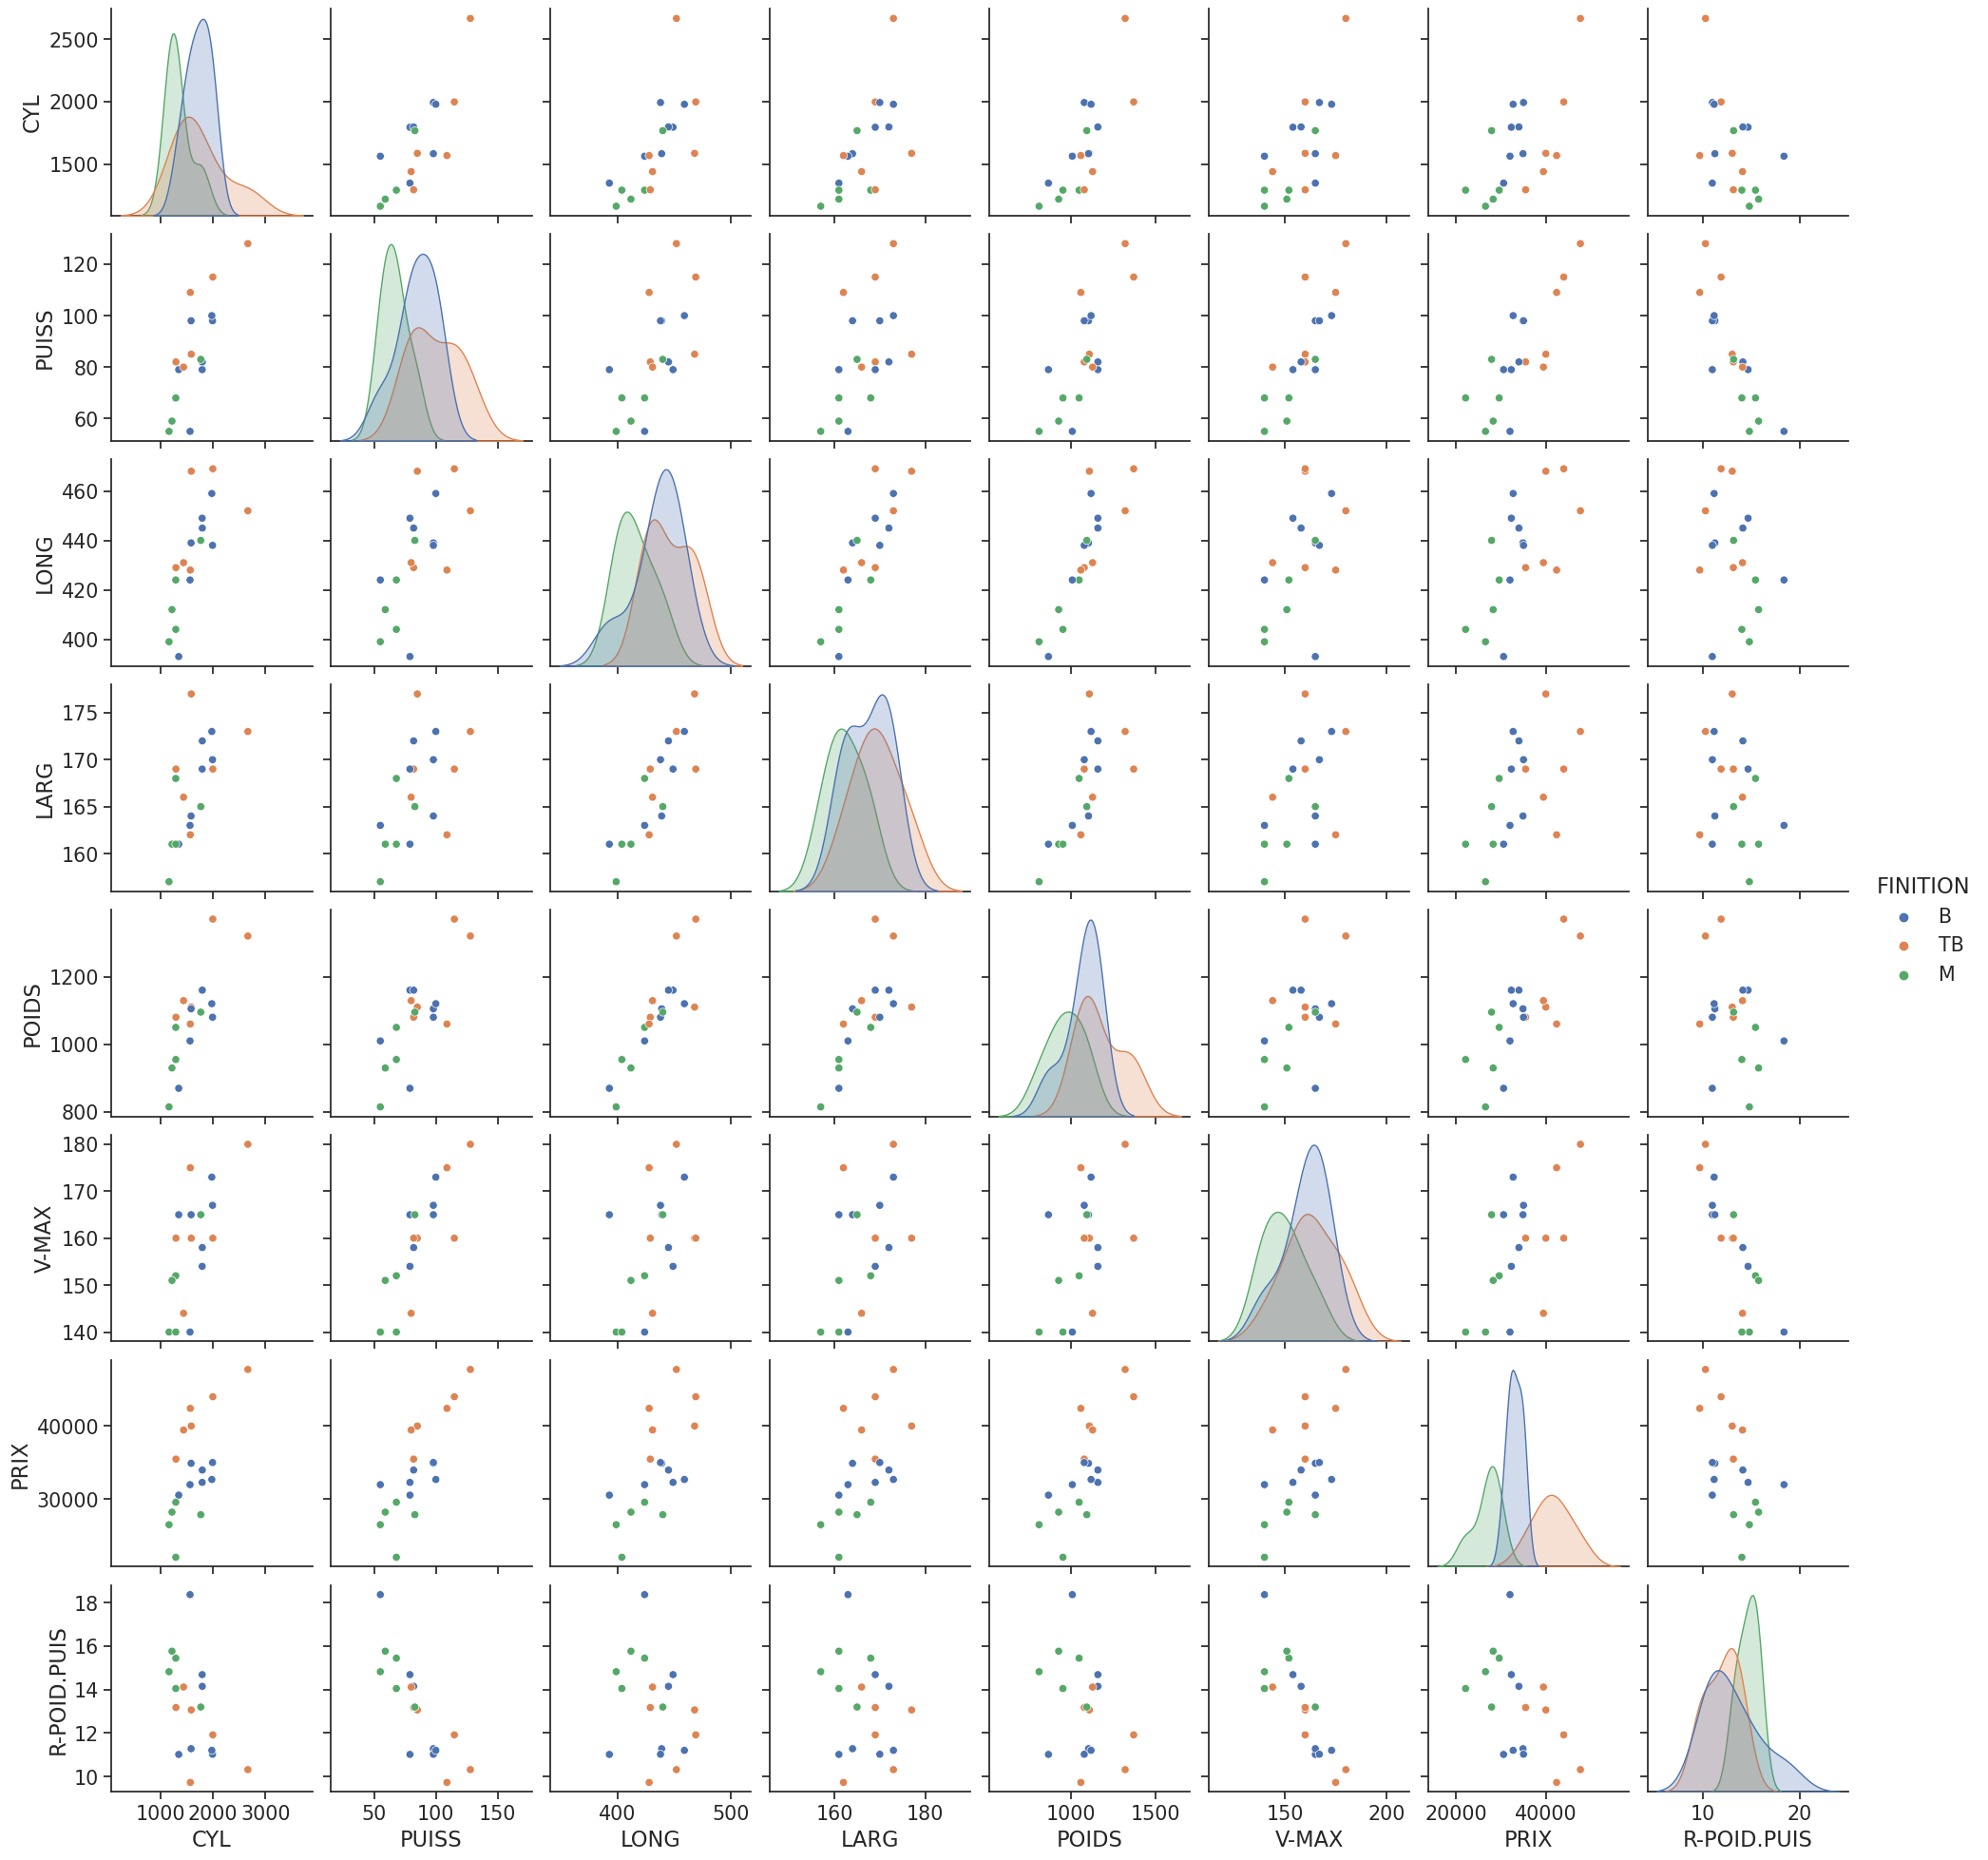

In [3]:
sb.set(font_scale=1.35, style="ticks")
plot = sb.pairplot(data, hue='FINITION', diag_kind='kde')
plot.savefig("/home/alyabdillah/Documents/Prog/Data Science/dsProject/DataVisualisation.png")

In [ ]:
actif =data.iloc[:,0:6]
na=actif.shape[0]
pa=actif.shape[1]
illus=data.iloc[:,6:11]

plot = sb.pairplot(actif, diag_kind='kde')
plot.savefig("/home/alyabdillah/Documents/Prog/Data Science/dsProject/ActifVisualisation.png")

print(actif.corr())

In [ ]:
sc = StandardScaler()
Z = sc.fit_transform(actif)

print ("Données centrés réduits")
print (Z)

In [ ]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(Z)

In [ ]:
print("variance par composant principale: ")
print(acp.explained_variance_ratio_)
print("Variance cumulée par composant principale: ")
print(np.cumsum(np.round(acp.explained_variance_ratio_, decimals=4)*100))

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(1,pa+1), acp.explained_variance_ratio_, alpha=0.5,align='center',
label='% variance par composant')
plt.step(np.arange(1,pa+1),np.cumsum(acp.explained_variance_ratio_), where='mid',
label='% de variance cumulée')
plt.ylabel('variance (%)')
plt.xlabel('Composant')
plt.legend(loc='center')
plt.savefig("/home/alyabdillah/Documents/Prog/Data Science/dsProject/graphevariance.png")

In [ ]:
print("valeur propore par composant principale: ")
print((na-1)/na*acp.explained_variance_)
plt.axis([0.5,7,0,5])
plt.plot(np.arange(1,pa+1),acp.explained_variance_, marker='o', color='black')
plt.title("Composante/Val propore")
plt.ylabel("Valeur propre")
plt.xlabel("Composante")
plt.show()

In [ ]:
sqrt_val = np.sqrt(acp.explained_variance_)
corvar = np.zeros((pa,pa)) #corrélation des variables avec les axes
for k in range(pa):
    corvar[:,k] = acp.components_[k,:] * sqrt_val[k]
#afficher la matrice des corrélations variables x facteurs
print ('matrice de covariance')
print(corvar)

In [ ]:
print(pd.DataFrame({'id':actif.columns,'COR_1': corvar[:,0],'COR_2':corvar[:,1]}))

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(corvar[:,0],corvar[:,1], actif.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
    plt.axis((-1.2,1.2,-1.2,1.2))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
#affichage
plt.title("Cercle de corrélation")
plt.xlabel("composante 1")
plt.ylabel("Composante 2")
plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
#8. Carte des individus sur les 2 premiers axes Individus actifs
for i in range(na):
    plt.text(coord[i,0],coord[i,1],actif.index[i])
    plt.scatter(coord[i,0],coord[i,1], c = 'red')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

plt.title("Carte des individus sur 2 premiers axes ")
plt.xlabel("composante 1")
plt.ylabel("Composante 2")
plt.show()

In [ ]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(pa):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(pa):
    ctr[:,j] = ctr[:,j]/(na*(na-1)/na*acp.explained_variance_[j])
print(pd.DataFrame({'id':actif.index,'CTR_1':ctr[:,0],'COS2_1':cos2[:,0],'CTR_2':ctr[:,1],'COS2_2':cos2[:,1]}))
print ("affichage des contribution et cos² en pourcentage ")
print(pd.DataFrame({'id':actif.index,'CTR_1(%)':np.round(ctr[:,0]*100,0),
'COS²_1(%)':np.round(cos2[:,0]*100,0),'CTR_2(%)':np.round(ctr[:,1]*100,0),'COS²_2(%)':np.round(cos2[:,1]*100,0)}))